In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainSet = pd.read_csv('train.csv', sep=',')


# 1. Check what features are available in the dataset.

In [4]:
trainSet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Clean the data if required.

In [10]:
trainSet.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
trainSetDroppedNA = trainSet.dropna()

In [12]:
trainSetFilledNA = trainSet.fillna(method='ffill')

# 3. Create a pie chart presenting the male/female proportion.

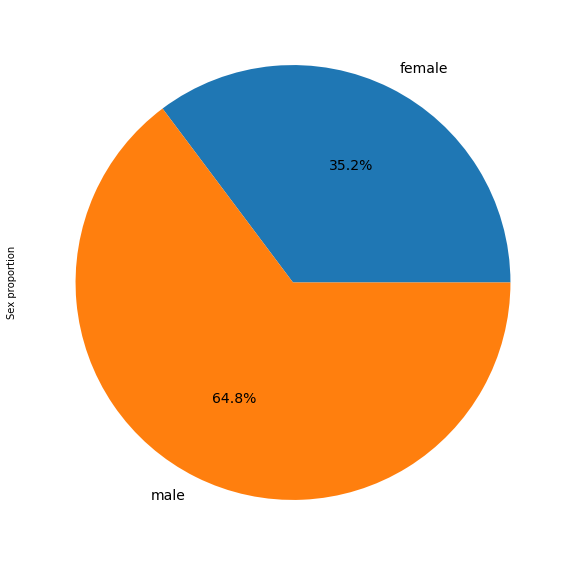

In [5]:
sex_count = trainSet[['Sex','PassengerId']].groupby('Sex').count()
sex_count.plot(kind='pie', y='PassengerId', autopct='%1.1f%%', legend = False, fontsize=14, figsize = (10,10))
plt.ylabel('Sex proportion')
plt.show()

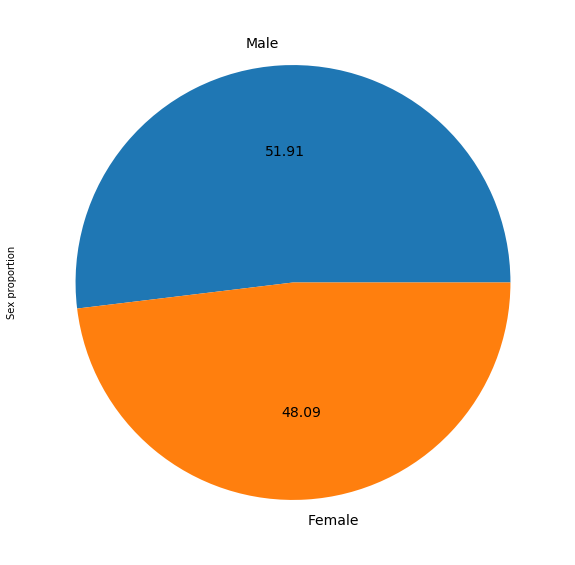

In [7]:
pd.Series([sum(trainSetDroppedNA['Sex']=='male'), sum(trainSetDroppedNA['Sex']=='female')], index = ['Male', 'Female'], name='Sex proportion').plot.pie(figsize = (10,10), autopct='%.2f', fontsize=14)
plt.show()

# 4.  Create a scatterplot with the “Fare payed” and the “Age”, differ the plot color by gender.

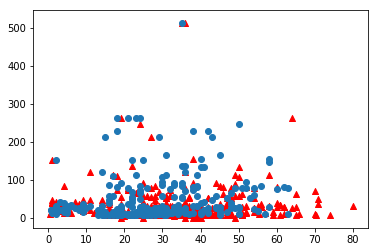

In [8]:
males = trainSet['Sex']=='male'
females = trainSet['Sex']=='female'
plt.scatter(trainSet[males]['Age'], trainSet[males]['Fare'], color = 'red', marker='^')
plt.scatter(trainSet[females]['Age'], trainSet[females]['Fare'])

# 5. Check how many people survived.

In [9]:
trainSet['Survived'].sum()

342

# 6. Create a histogram with the ’Fare payed’

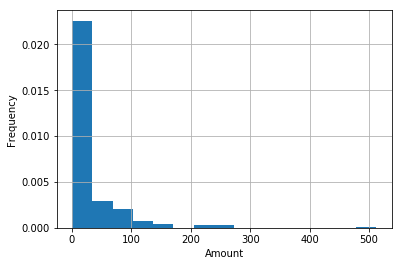

In [10]:
trainSet.Fare.hist(bins=15, density=True)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# 7. Own questions

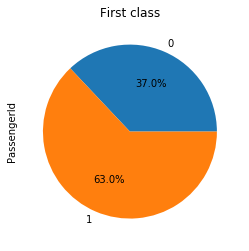

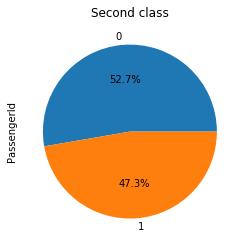

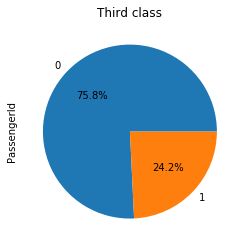

In [92]:
survived = pd.DataFrame(trainSet[['Survived','Pclass','PassengerId']].groupby(['Pclass', 'Survived']).count())
survived['PassengerId'][1].plot.pie(autopct='%1.1f%%')
plt.title('First class')
plt.show()
survived['PassengerId'][2].plot.pie(autopct='%1.1f%%')
plt.title('Second class')
plt.show()
survived['PassengerId'][3].plot.pie(autopct='%1.1f%%')
plt.title('Third class')
plt.show()

In [93]:
trainSetDroppedNA[['Survived','Age']].groupby('Survived').mean()

,Age
Survived,
0,41.350000
1,32.905854


In [14]:
trainSetDroppedNA.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

<Figure size 1152x576 with 0 Axes>

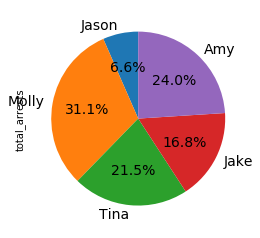

In [120]:
from pandas.plotting import table

# sample data
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart

df.plot(kind='pie', y = 'total_arrests', autopct='%1.1f%%', 
 startangle=90, labels=df['officer_name'], legend = False, fontsize=14)

plt.show()